In [2]:
data = read.table("dataAssignment2.txt",header=TRUE)
head(data, 10)

,x,y,z
,<dbl>,<dbl>,<int>
1,1.144,19.1,0
2,1.439,16.5,1
3,1.260,23.5,1
4,0.921,20.7,1
5,1.570,20.0,1
6,0.446,18.9,0
7,0.641,17.2,0
8,1.012,23.4,1
9,1.626,18.0,0


## 1a) Visualize the data


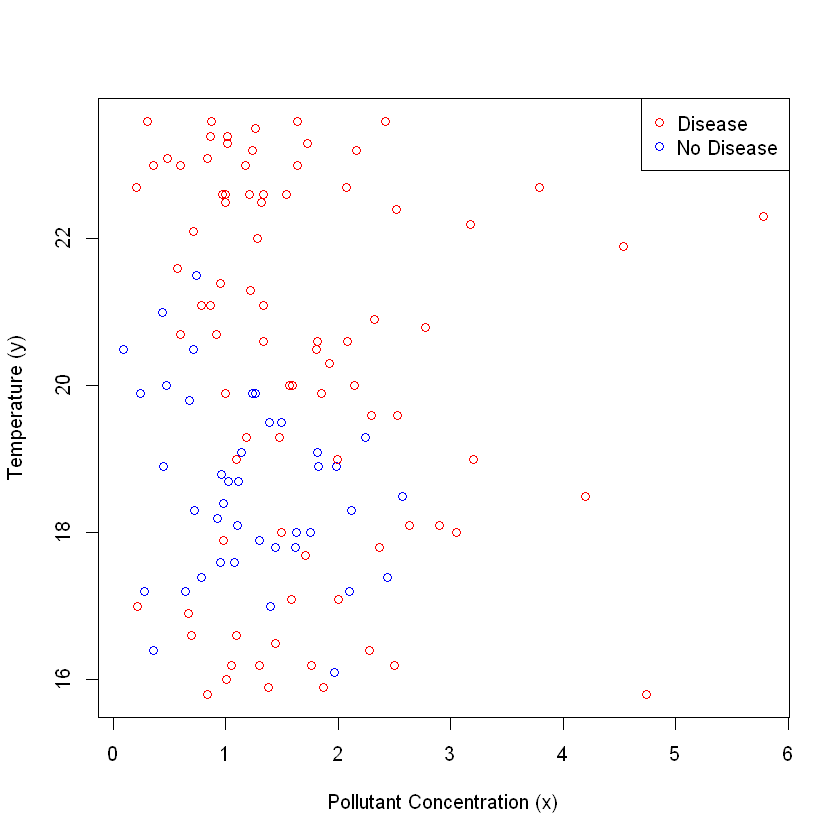

In [3]:
par(bg = "white")
plot(data$x, data$y, col=ifelse(data$z, "red", "blue"), xlab="Pollutant Concentration (x)", ylab="Temperature (y)")
legend("topright", legend=c("Disease", "No Disease"), col=c("red", "blue"), pch=1)

## 1b) What is the likelihood and posterior?

In [4]:
# Define the function f(x, y, theta1, theta2, theta3)
f <- function(x, y, theta) {
  theta1 <- theta[1]
  theta2 <- theta[2]
  theta3 <- theta[3]
  exp_part <- exp(exp(theta1) * x + exp(theta2) * (y - theta3)^2)
  p <- (exp_part - 1) / (exp_part + 1)
  return(p)
}

# Define the likelihood function
likelihood_log <- function(data, theta) {
  # Extract x, y, z from the data
  x <- data$x
  y <- data$y
  z <- data$z

  # Calculate probabilities for all data points
  p <- f(x, y, theta)
  # Compute the likelihood
  likelihood_vals <- ifelse(z==1,p,1-p)

  #total_likelihood <- prod(likelihood_vals)
  total_likelihood <- sum(log(likelihood_vals))

  #return(exp(total_likelihood))
  return(total_likelihood)
}

# Example usage
# Simulated dataset
set.seed(42)

# Parameters to test
theta <- c(0.6, 0.6, mean(data$y))

# Calculate the likelihood and posterior for the given parameters
likelihood_val <- likelihood_log(data, theta)

# Print results
cat("Likelihood:", likelihood_val, "\n")

Likelihood: -281.2436 


## 1c)
Write an R function that takes as input values for two parameters $θ = (θ_1, θ_2, θ_3)$ and $\theta^{*}=(\theta_{1}^{*},\theta_{2}^{*},\theta_{3}^{*})$ and computes a function that is
equal to
$$
\log\left(\frac{\pi(\theta^{*}\mid\mathrm{data})}{\pi(\theta\mid\mathrm{data})}\right)
$$
i.e., the logarithm of the quotient of the posterior densities for $θ*∗$ andθ

In [5]:
# Function to calculate the log posterior density ratio
log_posterior_ratio <- function(data, theta, theta_star) {
  # Extract parameters for theta and theta*

  # Calculate likelihood for theta and theta_star
  likelihood_theta <- likelihood_log(data, theta)
  likelihood_theta_star <- likelihood_log(data, theta_star)

  # Compute the logarithmic ratio of the posterior densities
  log_posterior_ratio <- likelihood_theta_star-likelihood_theta

  return(log_posterior_ratio)
}

# Define theta and theta_star as example
theta_star <- c(0.6, 0.9, mean(data$y))

# Calculate the log posterior ratio
log_ratio <- log_posterior_ratio(data, theta, theta_star)

# Print the result
cat("Log posterior ratio:", log_ratio, "\n")

Log posterior ratio: -75.04063 


## 1d)
Implement an MCMC algorithm that generates a Markov chain of length 10000 with limiting distribution equal to the posterior for θ.

Use a proposal distribution which adds to each parameter a normally distributed variable with expectation zero and standard deviation 0.4. Find a starting value for the chain by studying what values for θ might be reasonable for the given data.

Produce trace plots (plots mapping simulated values for $θ_i$ against its index i) for the parameters $θ_1, θ_2$, and $θ_3$.

In [6]:

##################################################
# Toy example using MCMC for Bayesian inference
##################################################
# How many steps in the Markov chain do we plan to generate: 
N <- 5000

# A vector for storing the simulated markov chain. 
# Its first value (and all other values) is initialized as 
# a random number in the interval from 0 to 1: 
# Create a data frame with N rows and 3 columns
theta <- list(c(runif(1), runif(1), mean(data$y)))

# Simulating the steps of the Markov chain:
for (i in 2:N) {
  # Simulating a proposal: We first generate a number which 
  # may be outside the interval (0,1); then we adjust it 
  # so that it is inside this interval: 
  
  proposal <- theta[[i-1]] + rnorm(3, 0, 0.4)
  #proposal <- proposal - floor(proposal)
  
  # Comnpute the acceptance probability: Note that, because the 
  # proposal function above is SYMMETRIC, we get  
  # q("old p" | "new p")/q("new p" | "old p") = 1
  # and that part of the acceptance probability formula disappears. 
  a <- min(1, exp(log_posterior_ratio(data, theta[[i-1]], proposal)))
  print(a)
  # Accept or reject, i.e., determine the next value in the Markov chain: 
  if (runif(1) < a)  
    theta[[i]] <- proposal
  else
    theta[[i]] <- theta[[i-1]]
}

[1] NaN


ERROR: Error in if (runif(1) < a) theta[[i]] <- proposal else theta[[i]] <- theta[[i - : missing value where TRUE/FALSE needed


In [ ]:
# Burn-in time
burn_in <- 500

# Extract the components of theta into separate vectors
theta1 <- sapply(theta, function(x) x[1])  # First component (for the first parameter)
theta2 <- sapply(theta, function(x) x[2])  # Second component (for the second parameter)
theta3 <- sapply(theta, function(x) x[3])  # Third component (for the third parameter)

# Calculate the mean of theta1, theta2, and theta3 after burn-in
mean_theta1 <- mean(theta1[(burn_in + 1):N])
mean_theta2 <- mean(theta2[(burn_in + 1):N])
mean_theta3 <- mean(theta3[(burn_in + 1):N])

# Print the results
cat("Mean of theta1 after burn-in:", mean_theta1, "\n")
cat("Mean of theta2 after burn-in:", mean_theta2, "\n")
cat("Mean of theta3 after burn-in:", mean_theta3, "\n")

Mean of theta1 after burn-in: -0.7833875 
Mean of theta2 after burn-in: -1.243879 
Mean of theta3 after burn-in: 18.51608 


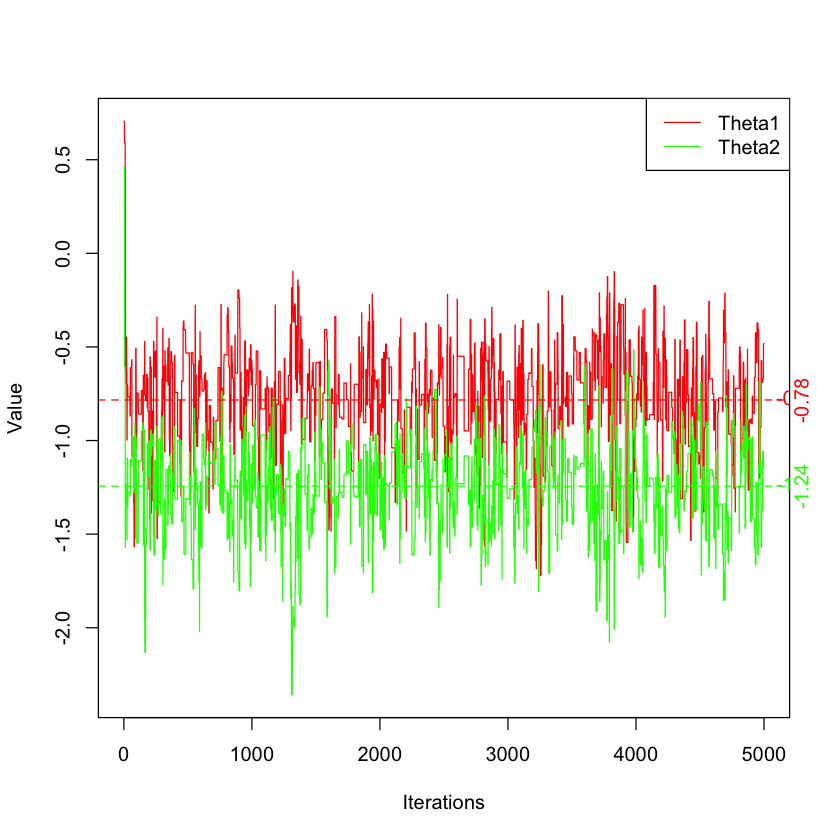

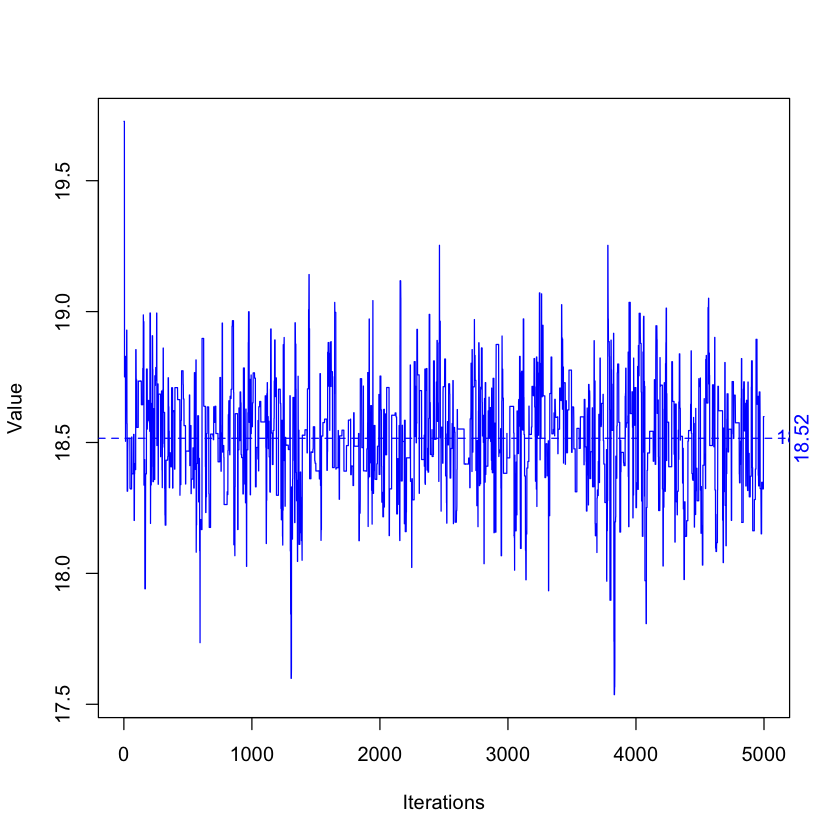

In [ ]:
# Set the background color to white
par(bg = "white")
# Add the means as dotted lines

# Create the plot
plot(theta1, type = "l", col = rgb(1, 0, 0), xlab = "Iterations", ylab = "Value", 
     ylim = range(c(theta1, theta2)))

# Add the other two components as lines
lines(theta2, col = rgb(0, 1, 0))  # Second trace in green
abline(h = mean_theta1, col = rgb(1, 0, 0), lty = 2)
abline(h = mean_theta2, col = rgb(0, 1, 0), lty = 2)
mtext(round(mean_theta1, 2), side = 4, line = 0, at = mean_theta1, col = rgb(1, 0, 0))
mtext(round(mean_theta2, 2), side = 4, line = 0, at = mean_theta2, col = rgb(0, 1, 0))
text(x = N, y = mean_theta1, labels = round(mean_theta1, 2), pos = 4, col = rgb(1, 0, 0))
text(x = N, y = mean_theta2, labels = round(mean_theta2, 2), pos = 4, col = rgb(0, 1, 0))
# lines(theta3, col = rgb(0, 0, 1))  # Third trace in blue
# Add a legend
legend("topright", legend = c("Theta1", "Theta2"), col = c(rgb(1, 0, 0), rgb(0, 1, 0)), lty = 1)

# Create a new plot for theta3
plot(theta3, type = "l", col = rgb(0, 0, 1), xlab = "Iterations", ylab = "Value")
abline(h = mean_theta3, col = rgb(0, 0, 1), lty = 2)
# Add text for the means
mtext(round(mean_theta3,2), side = 4, line = 0, at = mean_theta3, col = rgb(0, 0, 1))
text(x = N, y = mean_theta3, labels = round(mean_theta3, 2), pos = 4, col = rgb(0, 0, 1))


## 1e)
Compute numerically the predicted probability that an animal at pollutant concentration x = 0.7 and temperature y = 19 will have the disease.

Also, compute the predicted probability that among 10 animals exposed to this temperature and this pollutant concentration, 9 will have the disease.

In [ ]:
x_new <- 0.7
y_new <- 19
predictive_prob <- sapply(theta, function(t) f(x_new, y_new, t))
#predictive_prob <- f(x_new, y_new, c(mean_theta1,mean_theta2,mean_theta3))
predictive_prob <- mean(predictive_prob)
predictive_prob

[1] 0.2015423

In [149]:
n <- 10   # N total animals
k <- 9  # N with disease

probability <- dbinom(k, size = n, prob = predictive_prob)

cat("The predicted probability that 9 out of 10 animals have the disease is:", probability, "\n")


The predicted probability that 9 out of 10 animals have the disease is: 4.380737e-06 


# Exercise 2: Branching Process
Consider a branching process where the offspring distribution is a Poisson distribution with parameter λ = 1.4.

![](https://github.com/focccus/MVE550-Stochastic-processes/blob/main/A2/branching_process.png?raw=1)

## 2a)
Use R to compute the probability that such a process will go extinct.

In [73]:
# Define parameters
lambda <- 1.4

# Define the generating function
G <- function(s) exp(lambda * (s - 1))

# Define the fixed-point equation
fixed_point <- function(q) G(q) - q

# Use uniroot to find the smallest root in [0, 1]
extinction_probability <- uniroot(fixed_point, interval = c(0, 0.99))$root

# Output the extinction probability
cat("The extinction probability is:", extinction_probability, "\n")


The extinction probability is: 0.488989 


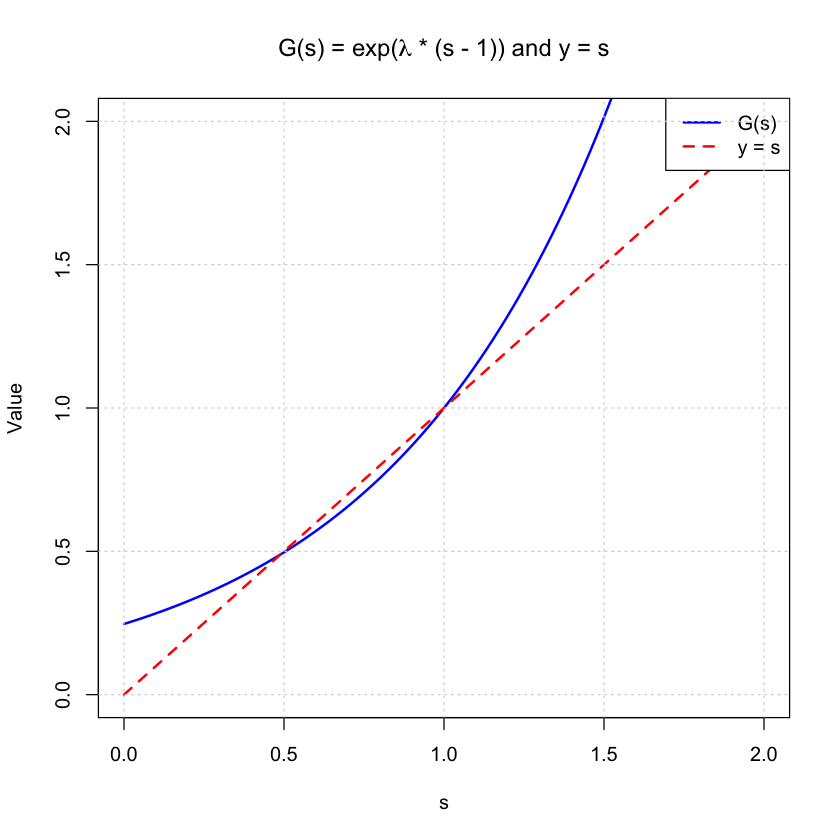

In [46]:
# Define the interval for s
s_values <- seq(0, 2, length.out = 100)

# Compute G(s) values
G_values <- G(s_values)

# Set the background color to white
par(bg = "white")

# Plot G(s)
plot(s_values, G_values, type = "l", col = "blue", lwd = 2,
     xlab = "s", ylab = "Value",
     main = expression("G(s) = exp(" * lambda * " * (s - 1)) and y = s"),
     xlim = c(0, 2), ylim = c(0, 2))

# Add the straight line y = s
lines(s_values, s_values, col = "red", lwd = 2, lty = 2)

# Add a legend
legend("topright", legend = c("G(s)", "y = s"), col = c("blue", "red"),
       lty = c(1, 2), lwd = 2, bg = "white")

# Add grid lines
grid()

## 2b)
Consider the process whose first 5 steps are pictured in Figure 1.
Assume its offspring distribution is Poisson(1.4). What is the probability that the continuation of this process will go extinct?

In [50]:
z_5 <- 11 # Number of active branches at step 5
combined_extinction_probability <- extinction_probability^z_5

# Print the result
combined_extinction_probability


[1] 0.0003821993

## 2c)
Now, consider instead a branching process with a Poisson(λ) offspring distribution where λ is unknown. We assume a prior $π(λ) ∝_\lambda \frac{1}{\lambda}$. Assume now that Figure 1 depicts a realization of this process.

What is the resulting likelihood for λ? What is the posterior distribution for λ?

## 2d)
We want to compute the probability of extinction of a branching process of the type of question (c), taking into account the uncertainty in λ. The extinction probability can then be written as an integral of a product of two functions of λ. Write down this integral and compute its value with R using numerical integration.

In [81]:
install.packages("rootSolve")


The downloaded binary packages are in
	/var/folders/jn/37pcc_2d3cb93f1k9r7crxv00000gn/T//Rtmp2cbw3k/downloaded_packages


In [88]:
library(rootSolve)

# Extinction probability function
extinction_prob <- function(lambda) {
  # Ensure lambda is a single numeric value
  sapply(lambda, function(l) {
    all_roots <- uniroot.all(function(q) exp(l * (q - 1)) - q, c(0, 1))

    return(min(all_roots))
  })
}

# Function to integrate
integrand <- function(lambda) {
  q_lambda <- extinction_prob(lambda) # Compute extinction probability
  g_lambda <- dgamma(lambda, shape = 29, rate = 25) # Gamma PDF using dgamma
  q_lambda * g_lambda
}

# Perform the integral from 0 to 10
integrated_extinction_probability <- integrate(Vectorize(integrand), lower = 0, upper = 3)$value

# Print the result
integrated_extinction_probability


[1] 0.7482959

## 2e)
Consider the process in in Figure 1, depicting a realization of a branching process with a Poisson(λ) offspring distribution with unknown λ, as in question (c). Compute the probability that the continuation of this process will go extinct.


In [89]:
combined_integrated_extinction_probability <- integrated_extinction_probability^z_5
combined_integrated_extinction_probability


[1] 0.04119146